In [1]:
# 1) Linear Regression
# 2) It would be better to use Quadratic Regression over Linear Regression if you hypothesize the data will have a curvy linear line instead of just a straight linear line used in Linear Regression. An example of when to use Quadratic Regression over Linear Regression is if you had data on 20 hotels, including, X = hotel rating and Y = nightly price. The following would be better suited for curved linear line, rather than a linear one.
# 3) Trend + Seasonal Pattern
# 4) Regression
# 5) Supervised - Classification
# 6) Biased
# 7) It would be classified as a blue square because 6 of the 11 closest observations are blue squares.
# 8) Unsupervised

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bokeh.charts import BoxPlot, Scatter, show, output_file
from bokeh.layouts import row
from sklearn import linear_model
%matplotlib inline


In [2]:
auto = pd.read_csv('AutoPrice.csv')
library = pd.read_csv("Library_Usage(1).csv")
university = pd.read_csv("NationalUniversitiesRankings.csv")

In [20]:
library.head()

,PatronTypeCode,PatronTypeDefinition,TotalCheckouts,TotalRenewals,AgeRange,HomeLibraryCode,HomeLibraryDefinition,CirculationActiveMonth,CirculationActiveYear,NoticePreferenceCode,NoticePreferenceDefinition,ProvidedEmailAddress,YearPatronRegistered,OutsideofCounty
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False


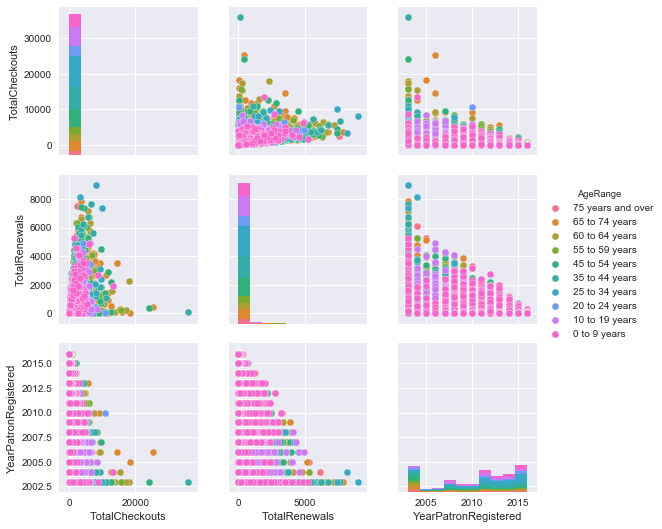

In [55]:
# 9)
sns.pairplot(library.loc[:,["AgeRange", "TotalCheckouts", "TotalRenewals", "YearPatronRegistered"]], hue = "AgeRange");



In [3]:
# 10)
p = BoxPlot(library, values = "TotalCheckouts", label = "AgeRange", color = "AgeRange", outliers = False, plot_width = 1000, plot_height = 800, title = "Total Checkouts Summary (Grouped by Age Range)")
show(p)

In [4]:
# 11)
p2 = BoxPlot(library, values = "TotalCheckouts", label = "HomeLibraryDefinition", color = "HomeLibraryDefinition", outliers = False, plot_width = 1000, plot_height = 800, title = "Total Checkouts (Grouped by Home Library Definition)")
output_file("Total_Checkouts-by-Home_Library_Definition.html")
show(p2)

INFO:bokeh.core.state:Session output file 'Total_Checkouts-by-Home_Library_Definition.html' already exists, will be overwritten.


In [36]:
university.head()

,Name,Location,Rank,Tuition and fees,Fees,In-state,Undergrad Enrollment,UG
0,Princeton University,"Princeton, NJ",1,"$45,320",45320.0,NaN,"5,402",5402.0
1,Harvard University,"Cambridge, MA",2,"$47,074",47074.0,NaN,"6,699",6699.0
2,University of Chicago,"Chicago, IL",3,"$52,491",52491.0,NaN,"5,844",5844.0
3,Yale University,"New Haven, CT",3,"$49,480",49480.0,NaN,"5,532",5532.0
4,Columbia University,"New York, NY",5,"$55,056",55056.0,NaN,"6,102",6102.0


In [45]:
university.dtypes

Name                   object
Location               object
Rank                    int64
Tuitionandfees         object
Fees                    int64
In-state               object
UndergradEnrollment    object
UG                      int64
dtype: object

In [5]:
# 12)
tooltips=[
  ('Name', '@Name'),
  ('Location', '@Location'),
  ('Rank', '@Rank'),
  ('Tuition and fees', '@Fees'),
  ('Undergrad Enrollment', '@UG')
]

scatter1 = Scatter(university, x = "Fees", y = "Rank", title = "Tuition_and_fees vs Rank", plot_width = 640, plot_height = 480, tooltips=tooltips)
scatter2 = Scatter(university, x = "UG", y = "Rank", title = "Undergrad Enrollment vs Rank", plot_width = 640, plot_height = 480, tooltips=tooltips)

show(row(scatter1, scatter2))

Coefficients: 
 [[ 0.04260379]]
Mean squared error: 3741.28
Variance score: -5.31


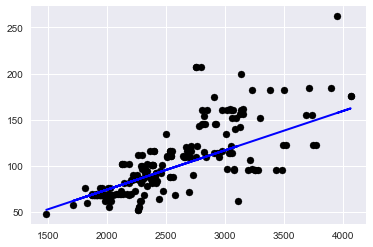

In [50]:
# 13)
auto_X = auto[['curbweight']]
auto_Y = auto[['horsepower']]


# Split the data into training/testing sets
auto_X_train = auto_X[:-20]
auto_X_test = auto_X[-20:]

# Split the targets into training/testing sets
auto_Y_train = auto_Y[:-20]
auto_Y_test = auto_Y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(auto_X_train, auto_Y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(auto_X_test) - auto_Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(auto_X_test, auto_Y_test))

# Plot outputs
plt.scatter(auto_X, auto_Y,  color='black')
plt.plot(auto_X, regr.predict(auto_X), color='blue', linewidth=2)

# plt.xticks(())
# plt.yticks(())

plt.show()

In [13]:
regr.predict(3000)

array([ 116.79379139])

In [14]:
regr.predict(5000)

array([ 202.00137126])

In [ ]:
# 13)
#   1) 116.79379139
#   2) 202.00137126
#   3) 0.04260379
#   4) 3741.28
#   5) -5.31